In [380]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [382]:
## 한글 폰트 추가
plt.rc('font', family='NanumBarunGothic') 
plt.rc('axes', unicode_minus=False)

import matplotlib as mpl
mpl.rc('axes', unicode_minus=False)

%matplotlib inline
%config InlineBackend.figure_format = 'retina' #차트 겁나 선명해짐
## 한글 폰트 추가

In [383]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [384]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgames2.csv', index_col=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [385]:
# df.drop(['Unnamed: 0'], axis=1, inplace=True)
# df.head()

In [386]:
df.replace('', np.nan, inplace=True)
df.head()
df.shape

(16598, 9)

In [387]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [388]:
# 결측치 제거
df = df.dropna(subset = ['Year', 'Genre', 'Publisher'], axis=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [389]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [390]:
# df[pd.to_numeric(df['Year'], errors='coerce').notnull()]

In [391]:
# int형으로 바꾸기
df['Year'] = df['Year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [392]:
def yearCorrector(original_year):
  if len(str(original_year)) == 1:
    year = '200' + str(original_year)
  elif len(str(original_year)) == 2 and original_year < 50:
    year = '20' + str(original_year)
  elif len(str(original_year)) == 2 and original_year >= 50:
    year = '19' + str(original_year)
  else:
    return original_year
  return int(year)

In [393]:
df['Year']=df['Year'].apply(yearCorrector)
df.head(76)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
74,Teenage Mutant Ninja Turtles,XB,2003,Action,Konami Digital Entertainment,0.22,0.06,0,0.01M
75,Age of Empires III: Complete Collection,PC,2009,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
76,Deadliest Catch: Sea of Chaos,PS3,2010,Sports,Crave Entertainment,0.08,0,0,0.01
77,Wrecking Crew,NES,1985,Platform,Nintendo,0,0,0.51,0


In [394]:
df.Platform.value_counts()  

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [395]:
# 100개 이하의 Platform 제거
platform_counts = df.Platform.value_counts()
platform_counts = pd.DataFrame(platform_counts)
platform_counts.columns=['count']
platform_counts

,count
DS,2127
PS2,2121
PS3,1299
Wii,1284
X360,1231
PSP,1193
PS,1185
PC,935
XB,799
GBA,784


In [396]:
platform_remove_targets = platform_counts[(platform_counts['count'] <= 100)].index.tolist()
platform_remove_targets

['NES', 'GB', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'GG', 'PCFX']

In [397]:
df = df[~df['Platform'].isin(platform_remove_targets)]
df.Platform.value_counts()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
Name: Platform, dtype: int64

In [398]:
# 50개 이하 Publisher 제거
Publisher_counts = df.Publisher.value_counts()
Publisher_counts = pd.DataFrame(Publisher_counts)
Publisher_counts.columns=['Publisher_count']
# pd.set_option('display.max_rows', None)
Publisher_counts

,Publisher_count
Electronic Arts,1331
Activision,961
Ubisoft,911
Namco Bandai Games,901
Konami Digital Entertainment,799
...,...
Panther Software,1
Playmore,1
"mixi, Inc",1
BushiRoad,1


In [399]:
Publisher_remove_targets = Publisher_counts[(Publisher_counts['Publisher_count'] <= 50)].index.tolist()
Publisher_remove_targets

['Kadokawa Shoten',
 'Destineer',
 'GT Interactive',
 'DTP Entertainment',
 'SquareSoft',
 'Alchemist',
 'MTV Games',
 'PQube',
 'Global Star',
 'Spike',
 'SouthPeak Games',
 'Takara Tomy',
 'TDK Mediactive',
 '3DO',
 'Nordic Games',
 'BAM! Entertainment',
 'Zoo Games',
 'Game Factory',
 'Mindscape',
 'Psygnosis',
 'Interplay',
 'Black Bean Games',
 'Activision Value',
 'FuRyu',
 'Prototype',
 'Level 5',
 'Arc System Works',
 'Little Orbit',
 'Kalypso Media',
 'Avanquest',
 'Telltale Games',
 'Midas Interactive Entertainment',
 'Enix Corporation',
 'Jaleco',
 'Aqua Plus',
 'Paradox Interactive',
 'Universal Interactive',
 'JoWood Productions',
 'Broccoli',
 'Kemco',
 'Oxygen Interactive',
 'Compile Heart',
 'Storm City Games',
 'ASCII Entertainment',
 'Taito',
 'Success',
 'Tomy Corporation',
 'City Interactive',
 'Zushi Games',
 'Titus',
 'SNK Playmore',
 'Rocket Company',
 'O-Games',
 'Koch Media',
 'DreamCatcher Interactive',
 'ChunSoft',
 'SCi',
 'Milestone S.r.l.',
 'GSP',
 'Falco

In [400]:
df = df[~df['Publisher'].isin(Publisher_remove_targets)]
df.Publisher.value_counts()

Electronic Arts                           1331
Activision                                 961
Ubisoft                                    911
Namco Bandai Games                         901
Konami Digital Entertainment               799
THQ                                        711
Sony Computer Entertainment                679
Nintendo                                   587
Sega                                       576
Take-Two Interactive                       411
Capcom                                     356
Atari                                      347
Tecmo Koei                                 338
Square Enix                                230
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Midway Games                               195
Eidos Interactive                          192
505 Games                                  191
Microsoft Game Studios                     189
D3Publisher                                182
Acclaim Enter

In [401]:
# Unknown 99개 제거
# df['Publisher'].value_counts().loc[lambda x: x<=99]
Publisher_Unknown_drop = df.drop(index = df[df['Publisher'] == 'Unknown'].index)
df = Publisher_Unknown_drop
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
6,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,0.14,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0,0
8,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0,0.11,0.01
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [402]:
def salesCorrector(sales):
  num = 0
  if sales[-1] in ['k', 'K']:
    num = sales[:-1]
    num = float(num)
    num = num*1000
    num = int(num)
  elif sales[-1] in ['m', 'M']:
    num = sales[:-1]
    num = float(num)
    num = num*1000000
    num = int(num)
  else:
    num = float(sales)
    num = num*1000000
    num = int(num)
  return num

In [403]:
df['NA_Sales']=df['NA_Sales'].apply(salesCorrector)
df['EU_Sales']=df['EU_Sales'].apply(salesCorrector)
df['JP_Sales']=df['JP_Sales'].apply(salesCorrector)
df['Other_Sales']=df['Other_Sales'].apply(salesCorrector)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000
6,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,140000,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,20000,10000,0,0
8,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,70000,0,110000,10000
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000


In [404]:
# Name이 한번 이상 나온 데이터를 확인 
df.Name.value_counts()

Need for Speed: Most Wanted      12
LEGO Marvel Super Heroes          9
FIFA 14                           9
Ratatouille                       9
FIFA 15                           8
                                 ..
Twisted Metal 2                   1
Cabela's Dangerous Hunts 2009     1
Blazing Souls: Accelate           1
ESPN Final Round Golf 2002        1
The King of Fighters '95          1
Name: Name, Length: 8276, dtype: int64

In [405]:
# 중복되는 Name이 여럿인 가운데 동일한 Name과 Platform을 가진 게임 3개 행 확인  (16138 rows × 9 columns)
df[df.duplicated(subset=['Name', 'Platform'])]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8718,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0,10000,0,0
12530,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1000000,170000,20000,100000
13809,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0,60000,0,20000


In [406]:
# 중복되는 Name이 여럿인 가운데 동일한 Name과 Platform을 가진 게임 3개 행 제거
df = df.drop_duplicates(subset=['Name', 'Platform'])

# 확인
df[df.duplicated(subset=['Name', 'Platform'])]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [407]:
# 중복값 없음.
df[df.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12479 entries, 2 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         12479 non-null  object
 1   Platform     12479 non-null  object
 2   Year         12479 non-null  int64 
 3   Genre        12479 non-null  object
 4   Publisher    12479 non-null  object
 5   NA_Sales     12479 non-null  int64 
 6   EU_Sales     12479 non-null  int64 
 7   JP_Sales     12479 non-null  int64 
 8   Other_Sales  12479 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 974.9+ KB


In [408]:
# 인덱스 재정렬
df.index = pd.RangeIndex(len(df.index))
df.index = range(len(df.index))
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000
1,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000
2,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,140000,0
3,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,20000,10000,0,0
4,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,70000,0,110000,10000
...,...,...,...,...,...,...,...,...,...
12474,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000
12475,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
12476,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000
12477,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000


***☑️ Feature Engineering***

In [409]:
def platformFinder(platform):
  if platform in ['GB', 'GBA', '3DS', 'DS', 'N64', 'NES', 'Wii', 'WiiU', 'SNES']:
    return 'Nintendo'
  elif platform in ['PSP', 'PS', 'PS2', 'PS3', 'PS4']:
    return 'PlayStation'
  elif platform is 'PC': 
    return 'PC'
  elif platform in ['X360', 'XB', 'XOne']: 
    return 'XBox'
  else:
    return 'Others'  

In [410]:
df['platform_group'] = df['Platform'].apply(platformFinder)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,platform_group
0,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000,Nintendo
1,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,PlayStation
2,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,140000,0,Nintendo
3,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,20000,10000,0,0,Others
4,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,70000,0,110000,10000,PlayStation
...,...,...,...,...,...,...,...,...,...,...
12474,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,Others
12475,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,PlayStation
12476,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,PlayStation
12477,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,Others


In [411]:
# df['total'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
total_sales = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
df["total_sales"] = total_sales.sum(axis = 1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,platform_group,total_sales
0,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000,Nintendo,180000
1,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,PlayStation,250000
2,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,140000,0,Nintendo,140000
3,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,20000,10000,0,0,Others,30000
4,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,70000,0,110000,10000,PlayStation,190000


***1️⃣ 지역에 따라서 선호하는 게임 장르가 다를까?***

In [412]:
df.Genre.value_counts()

Action          2723
Sports          1924
Misc            1221
Role-Playing    1057
Shooter         1033
Racing           952
Adventure        739
Platform         691
Fighting         645
Simulation       638
Strategy         510
Puzzle           346
Name: Genre, dtype: int64

In [413]:
# 총 판매량
region_Genre = df.groupby('Genre', as_index=True)['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'].sum()
region_Genre.T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,776759997,73970000,200599999,335359999,329780000,69349999,322349997,265039999,516209997,166079998,611619996,60530000
EU_Sales,483809997,44750000,92170000,183470000,163899999,38080000,217459999,150839998,294179996,105980000,351289999,40770000
JP_Sales,128310000,30120000,68990000,80950000,83340000,31510000,45730000,215500000,30950000,50580000,98400000,39150000
Other_Sales,176929998,12860000,34220000,64679999,44420000,9610000,72110000,47980000,97850000,28870000,126739999,10320000


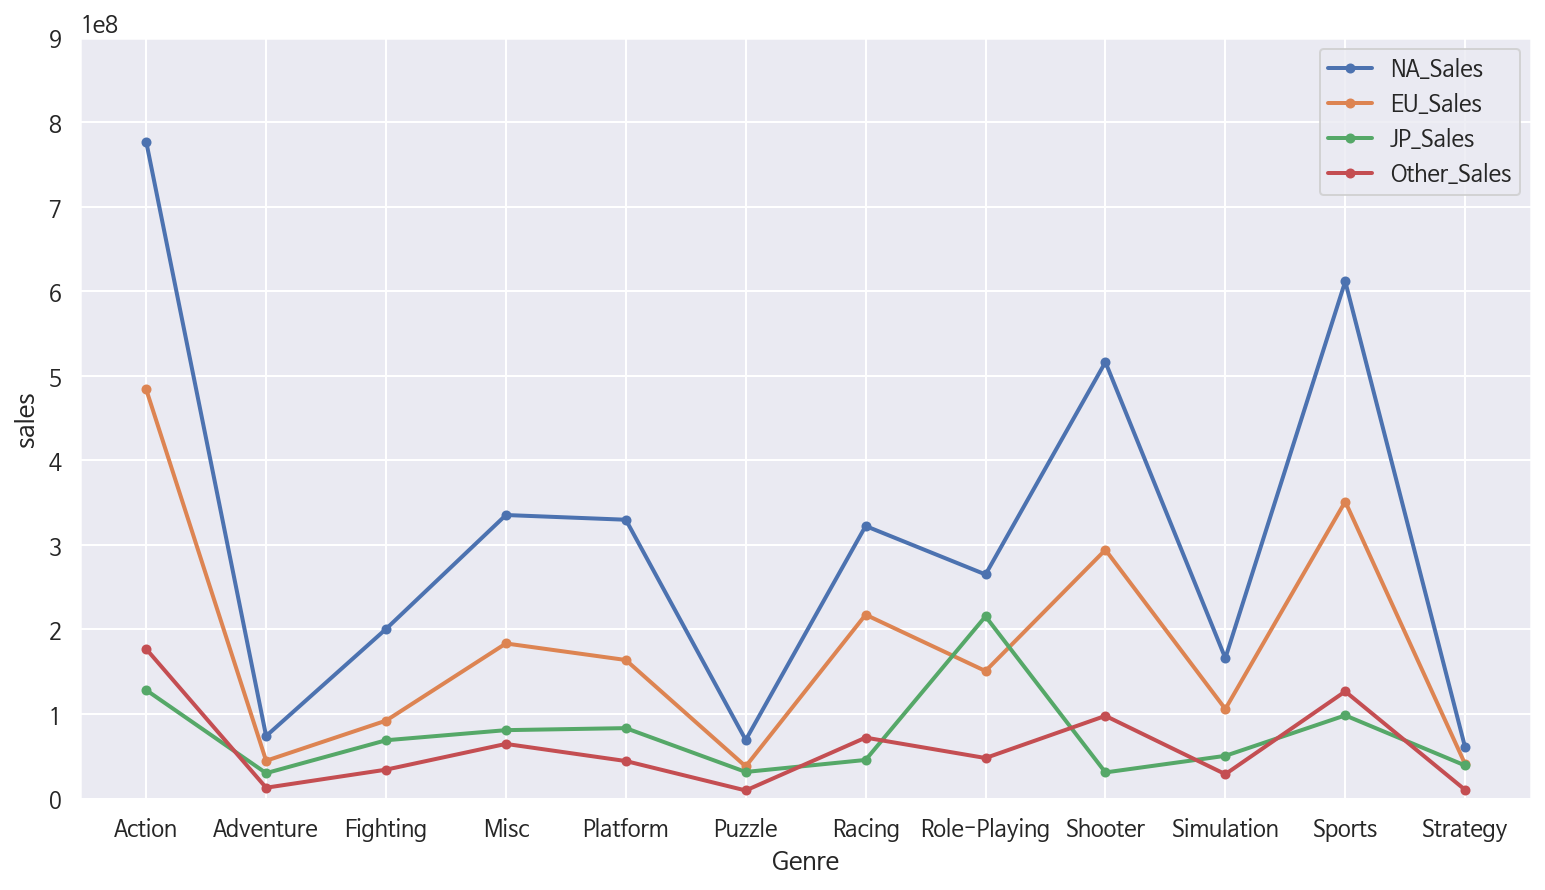

In [414]:
region_Genre.plot(ylim=(0, 900000000), figsize=(13, 7), grid=True, xlabel="Genre", ylabel="sales", marker='o', ms=4, lw=2)
plt.xticks(range(0,len(region_Genre.index)), region_Genre.index)
plt.show()

**📌 판매량이 높은 북미(NA)지역을 주력으로 판매하는 것이 유리함. 또한 Action장르의 게임을 개발하는 것이 좋음.**

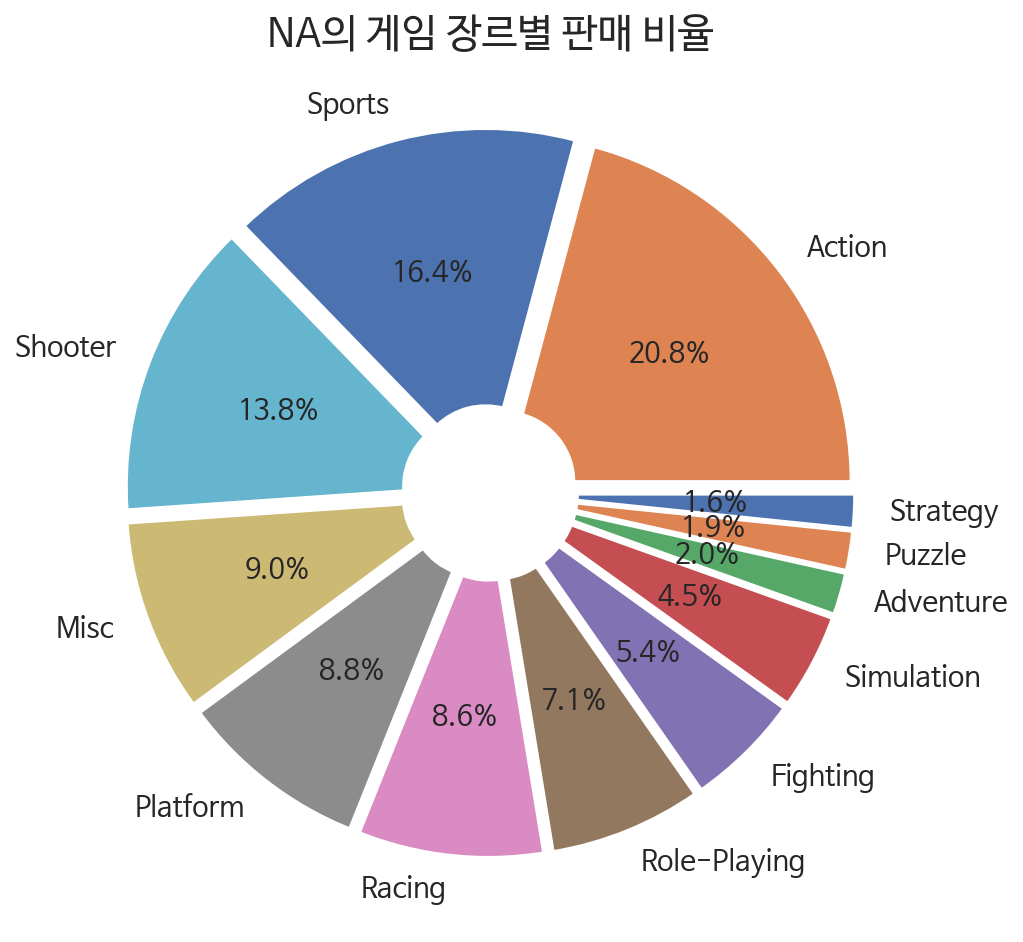

In [415]:
NA_Genre = df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=True)

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 2}

NA_Genre.plot(fontsize=14, figsize=(10, 8), kind = 'pie', autopct='%.1f%%', counterclock=False, explode=explode, wedgeprops=wedgeprops)
plt.title('NA의 게임 장르별 판매 비율', size=20)
plt.ylabel('')
plt.show()

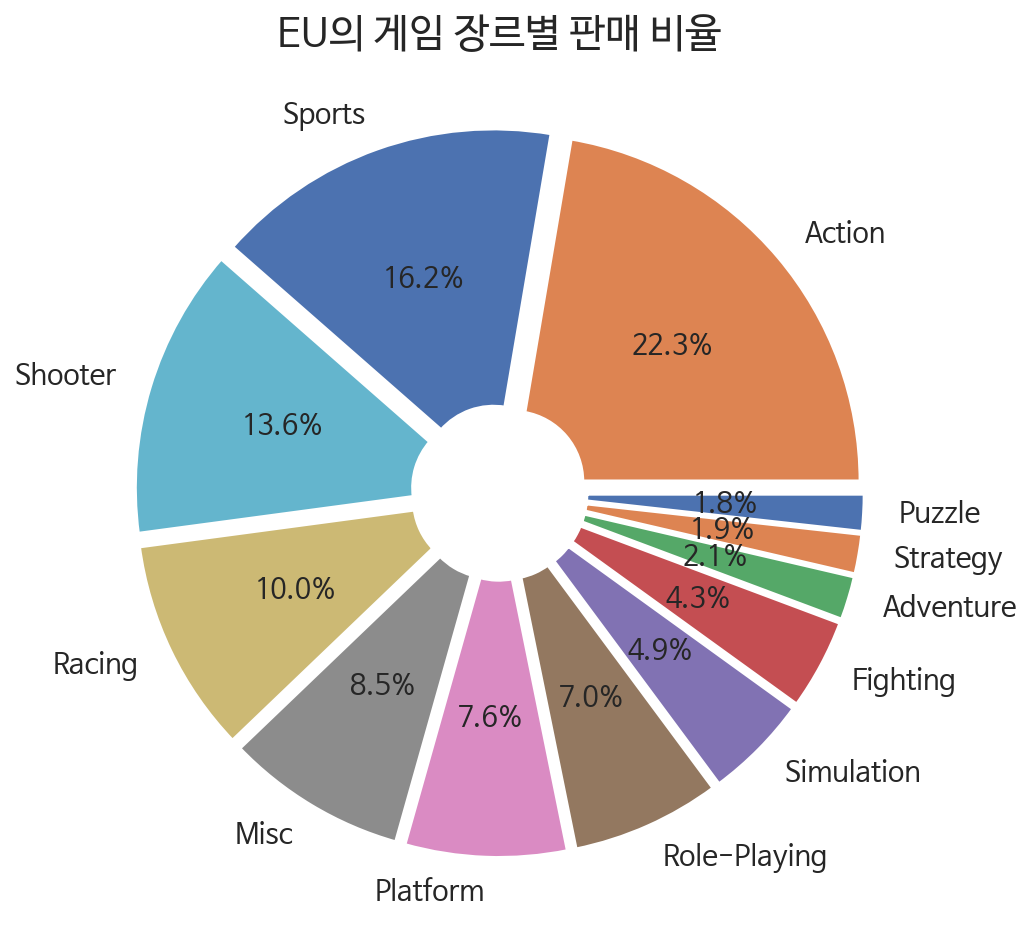

In [416]:
EU_Genre = df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=True)

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 2}

EU_Genre.plot(fontsize=14, figsize=(10, 8), kind = 'pie', autopct='%.1f%%', counterclock=False, explode=explode, wedgeprops=wedgeprops)
plt.title('EU의 게임 장르별 판매 비율', size=20) 
plt.ylabel('')
plt.show()

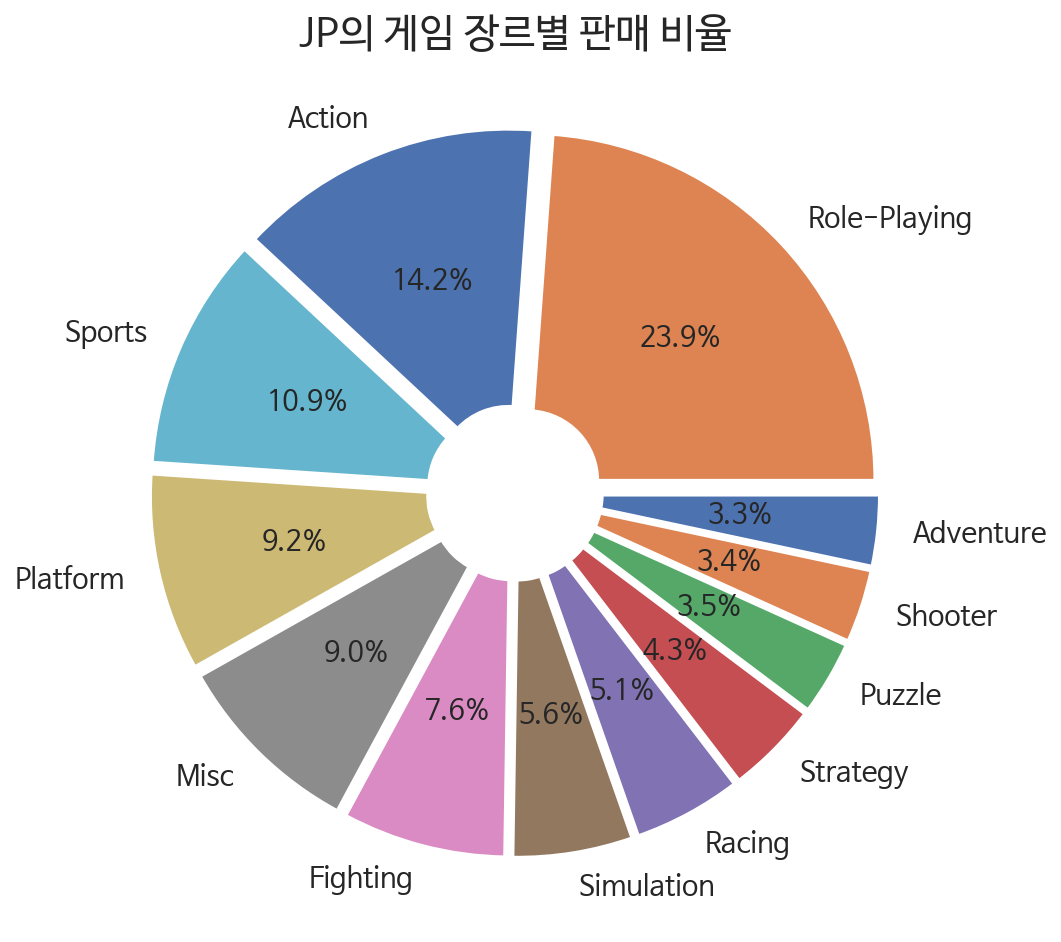

In [417]:
JP_Genre = df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=True)

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 2}

JP_Genre.plot(fontsize=14, figsize=(10, 8), kind = 'pie', autopct='%.1f%%', counterclock=False, explode=explode, wedgeprops=wedgeprops)
plt.title('JP의 게임 장르별 판매 비율', size=20) 
plt.ylabel('')
plt.show()

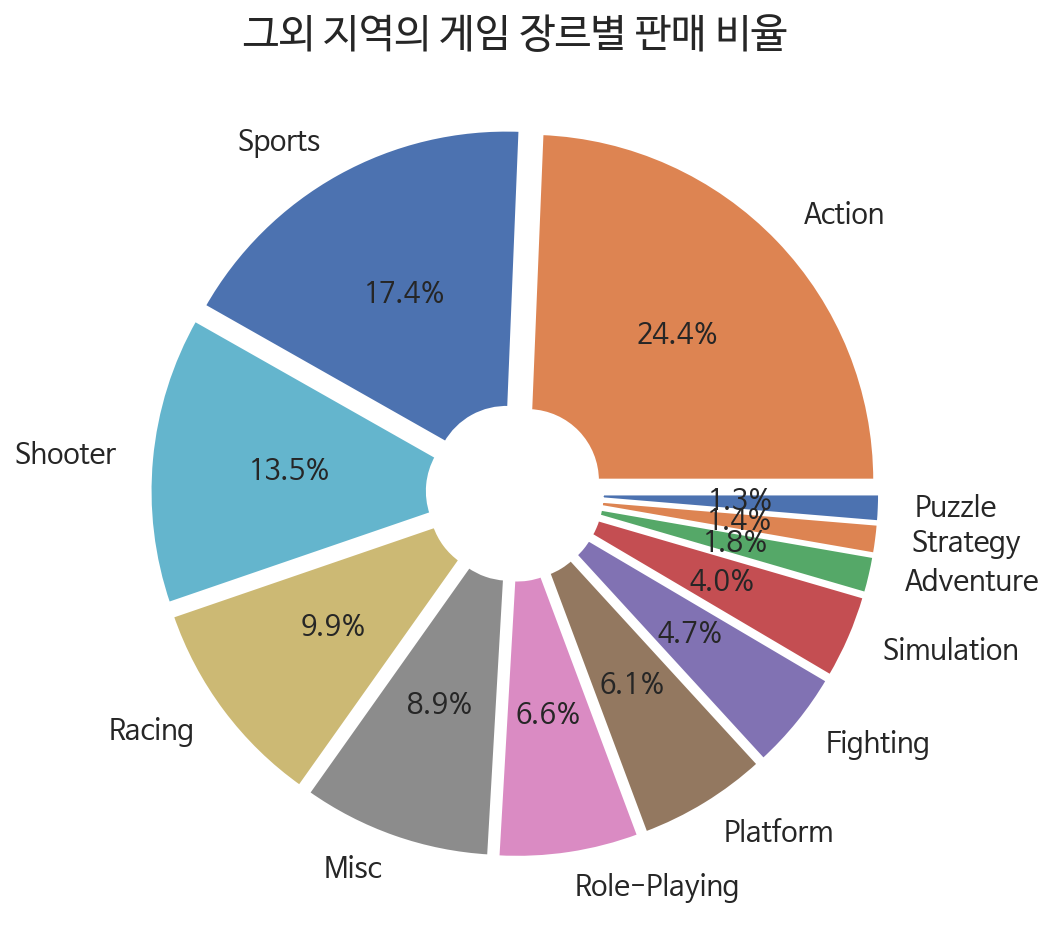

In [418]:
Other_Genre = df.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=True)

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 2}

Other_Genre.plot(fontsize=14, figsize=(10, 8), kind = 'pie', autopct='%.1f%%', counterclock=False, explode=explode, wedgeprops=wedgeprops)
plt.title('그외 지역의 게임 장르별 판매 비율', size=20) 
plt.ylabel('')
plt.show()

***2️⃣ 연도별 게임의 트렌드가 있을까?***

In [458]:
gametrend = df.groupby(['Year','Genre'])['total_sales'].sum()
gametrend = pd.DataFrame(gametrend)
gametrend

total_sales
Year Genre                    
1980 Action             340000
     Fighting           770000
     Misc              2700000
     Shooter           7070000
1981 Action            3500000
...                        ...
2016 Sports           14450000
     Strategy           430000
2017 Action              10000
     Role-Playing        40000
2020 Simulation         290000

[340 rows x 1 columns]

In [466]:
over_1980 = df[(df['Year'] >=1980) & (df['Year'] < 2000)]
over_1980

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,platform_group,total_sales
15,Ghost in the Shell,PS,1997,Simulation,Sony Computer Entertainment,60000,40000,0,10000,PlayStation,110000
26,Beamrider,2600,1984,Racing,Activision,260000,10000,0,0,Others,270000
34,Nippon Daihyou Team no Kantoku ni Narou! Sekai...,SAT,1998,Sports,Sega,0,0,120000,0,Others,120000
51,Command & Conquer,N64,1999,Strategy,Nintendo,220000,50000,0,0,Nintendo,270000
59,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000,PlayStation,180000
...,...,...,...,...,...,...,...,...,...,...,...
12448,Zen-Nippon GT Senshuken,SNES,1995,Racing,Banpresto,0,0,40000,0,Nintendo,40000
12455,Um Jammer Lammy,PS,1998,Misc,Sony Computer Entertainment,120000,80000,410000,40000,PlayStation,650000
12466,Shanghai: True Valor,PS,1998,Puzzle,Activision,10000,10000,0,0,PlayStation,20000
12472,Namco Soccer Prime Goal,PS,1995,Sports,Sony Computer Entertainment,0,0,120000,10000,PlayStation,130000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_

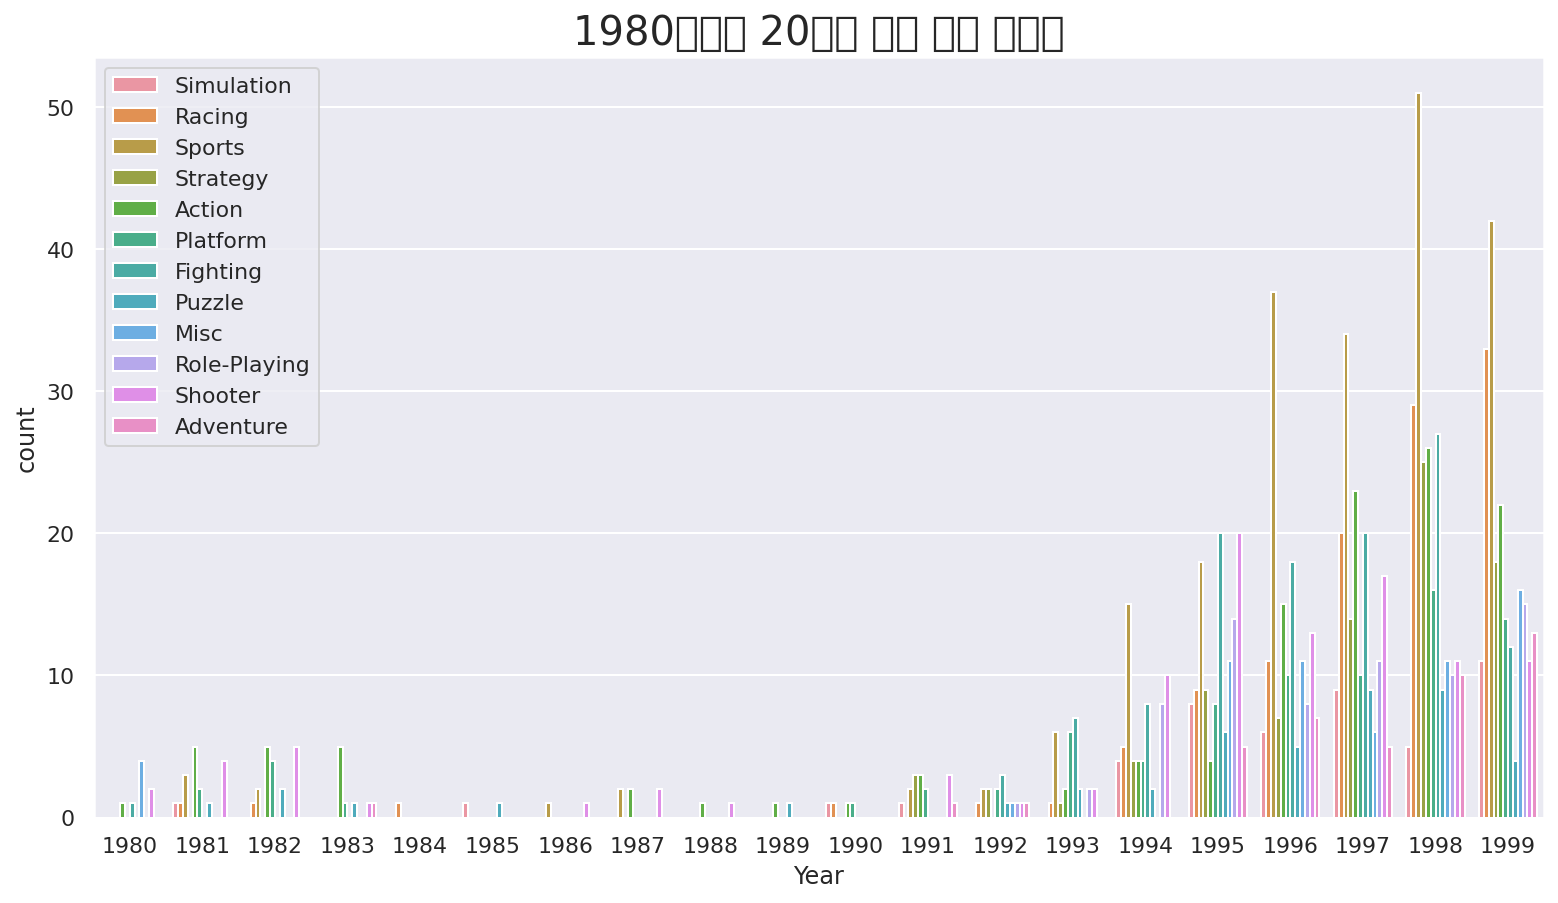

In [467]:
sns.countplot(x="Year", hue="Genre", data=over_1980)
sns.set(rc={'figure.figsize':(13,7)})
plt.title("1980년부터 20년간 게임 장르 선호도", fontsize = 20)
plt.legend(loc='upper left')
plt.show()

In [468]:
over_2000 = df[(df['Year'] >=2000) & (df['Year'] <= 2020)]
over_2000

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,platform_group,total_sales
0,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000,Nintendo,180000
1,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,PlayStation,250000
2,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,140000,0,Nintendo,140000
3,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,20000,10000,0,0,Others,30000
4,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,70000,0,110000,10000,PlayStation,190000
...,...,...,...,...,...,...,...,...,...,...,...
12473,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4179999,260000,10000,80000,PlayStation,4529999
12474,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,Others,200000
12475,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,PlayStation,10000
12476,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,PlayStation,790000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_

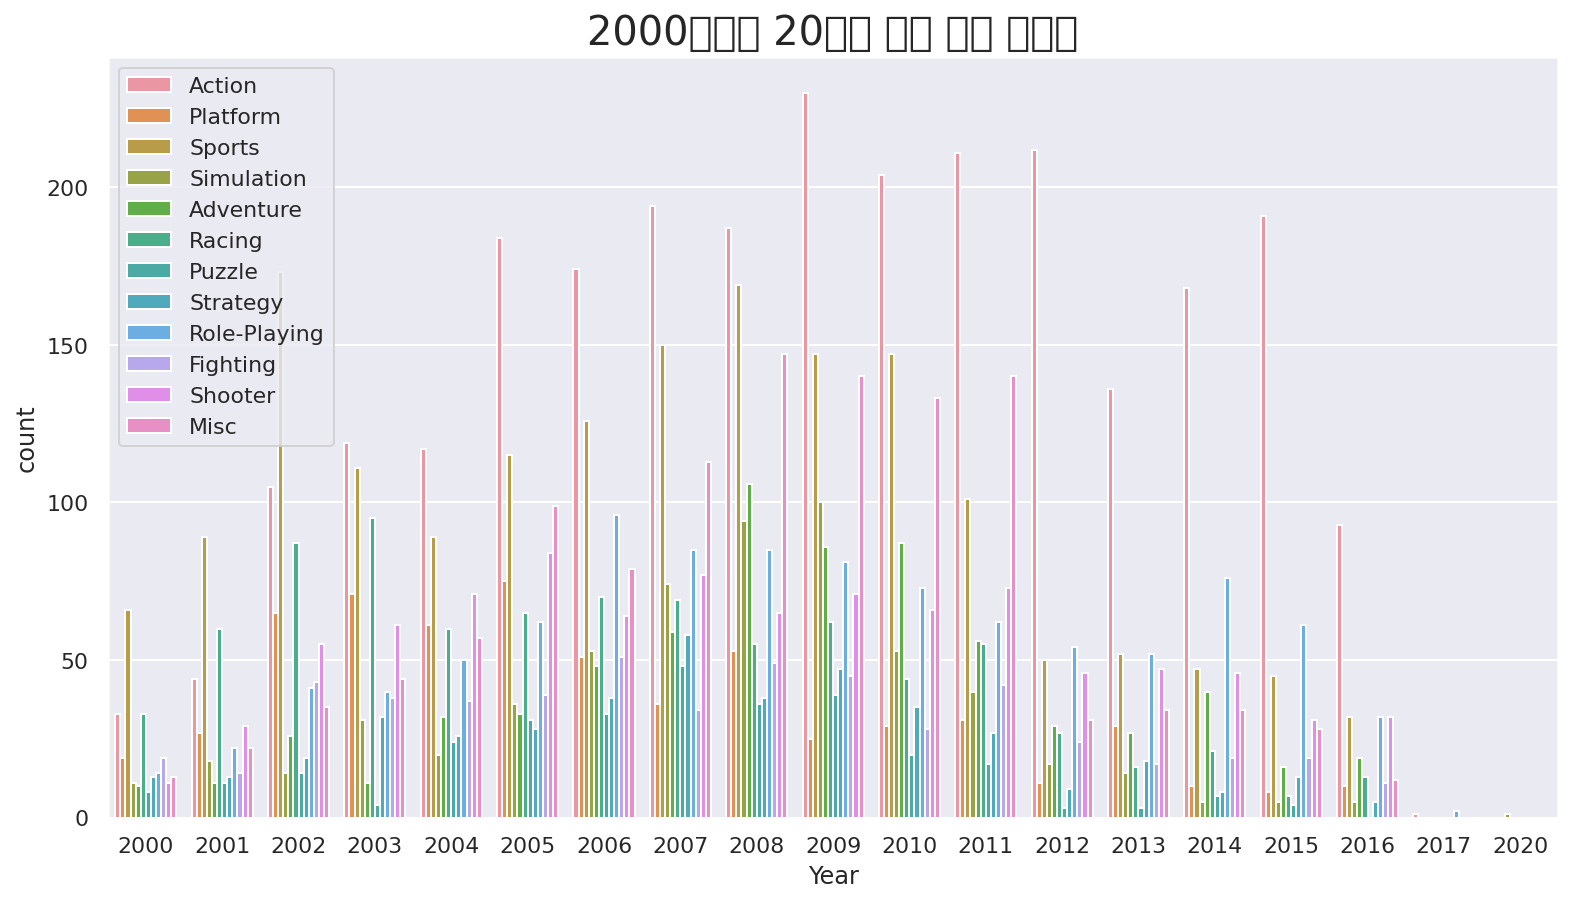

In [469]:
sns.countplot(x="Year", hue="Genre", data=over_2000)
plt.title("2000년부터 20년간 게임 장르 선호도", fontsize = 20)
sns.set(rc={'figure.figsize':(13,7)})
plt.legend(loc='upper left')
## 한글 폰트 추가
plt.rc('font', family='NanumBarunGothic') 
plt.rc('axes', unicode_minus=False)
## 한글 폰트 추가
plt.show()

In [470]:
over_2010 = df[(df['Year'] >=2010) & (df['Year'] <=2020)]
over_2010

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,platform_group,total_sales
1,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,PlayStation,250000
3,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,20000,10000,0,0,Others,30000
6,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,40000,30000,0,10000,PlayStation,80000
12,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,Namco Bandai Games,0,0,30000,0,PlayStation,30000
13,Grand Kingdom,PS4,2015,Role-Playing,Nippon Ichi Software,20000,0,30000,0,PlayStation,50000
...,...,...,...,...,...,...,...,...,...,...,...
12463,Yoru no Nai Kuni,PS4,2015,Role-Playing,Tecmo Koei,0,0,80000,0,PlayStation,80000
12465,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,130000,120000,0,20000,XBox,270000
12471,MindJack,PS3,2011,Shooter,Square Enix,70000,80000,0,30000,PlayStation,180000
12476,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,PlayStation,790000


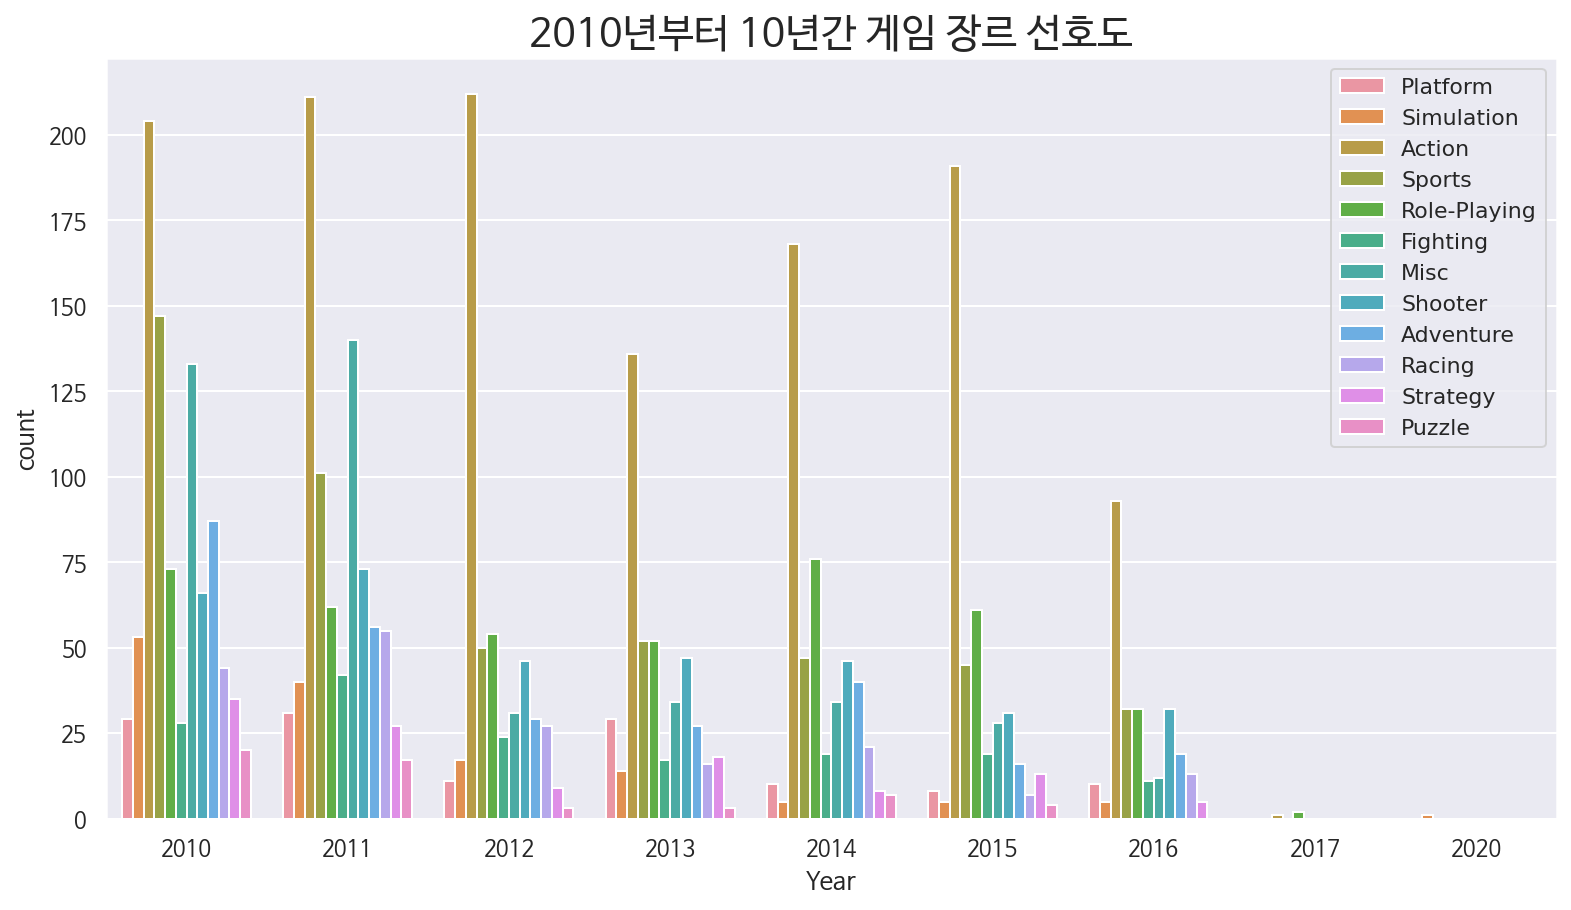

In [471]:
sns.countplot(x="Year", hue="Genre", data=over_2010)
plt.title("2010년부터 10년간 게임 장르 선호도", fontsize = 20)
sns.set(rc={'figure.figsize':(13,7)})
plt.legend(loc='upper right')
plt.show()

**📌 최근 10년간 Action장르의 게임이 많이 출시되었으며 판매량도 높았으므로 Action장르를 개발하는 것이 유리함.**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_

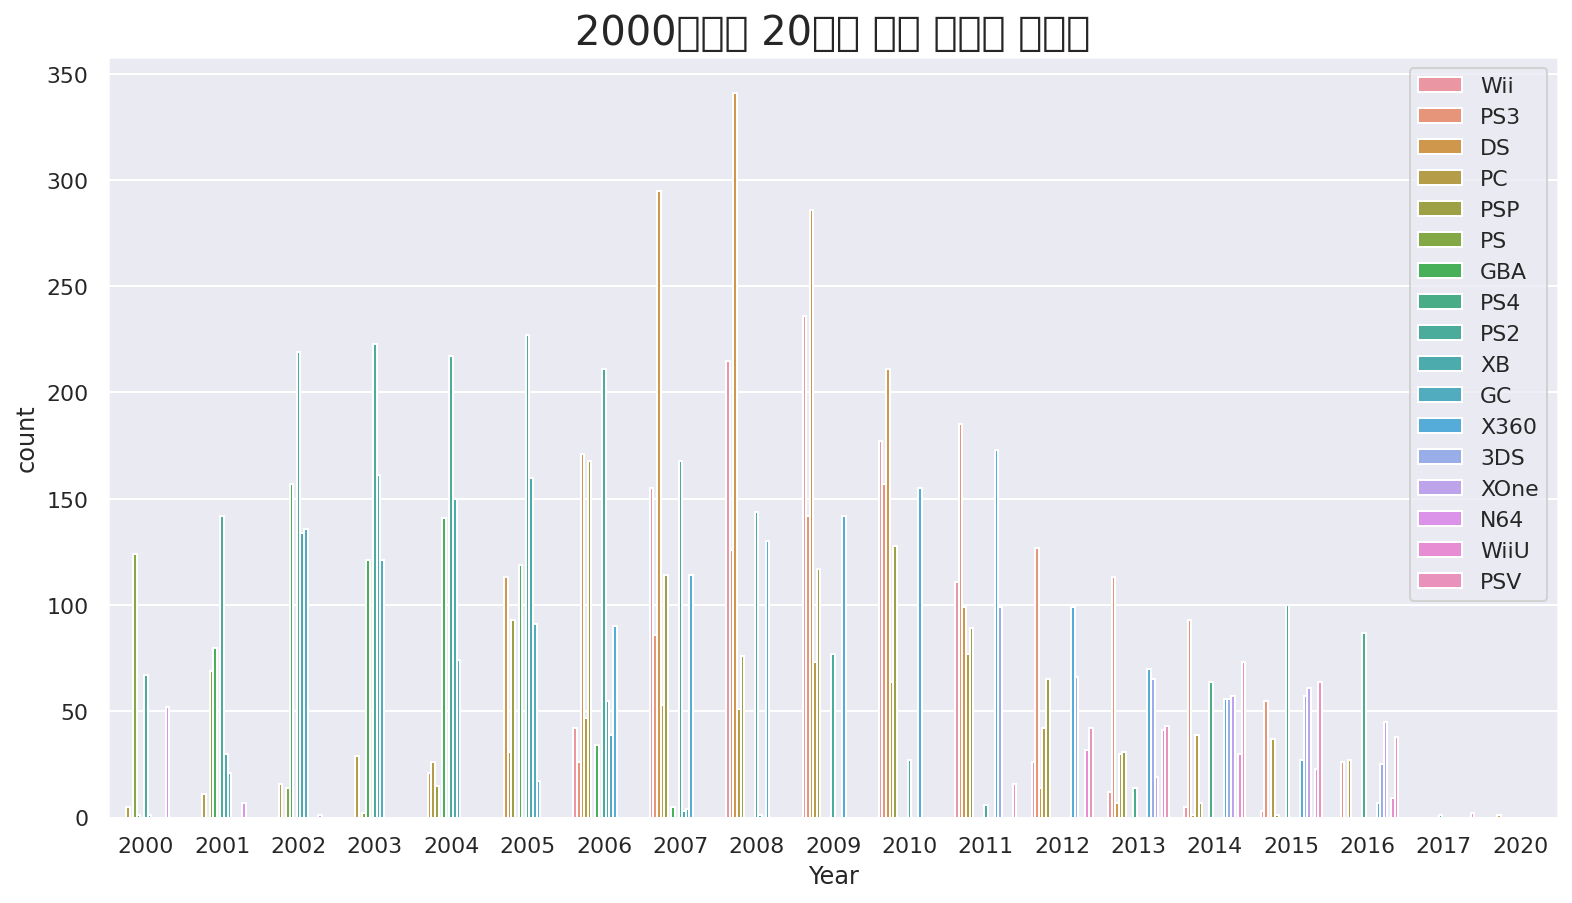

In [485]:
# 20년간 게임 플랫폼 선호도 비교 
sns.countplot(x="Year", hue="Platform", data=over_2000)
plt.title("2000년부터 20년간 게임 플랫폼 선호도", fontsize = 20)
sns.set(rc={'figure.figsize':(13,7)})
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_

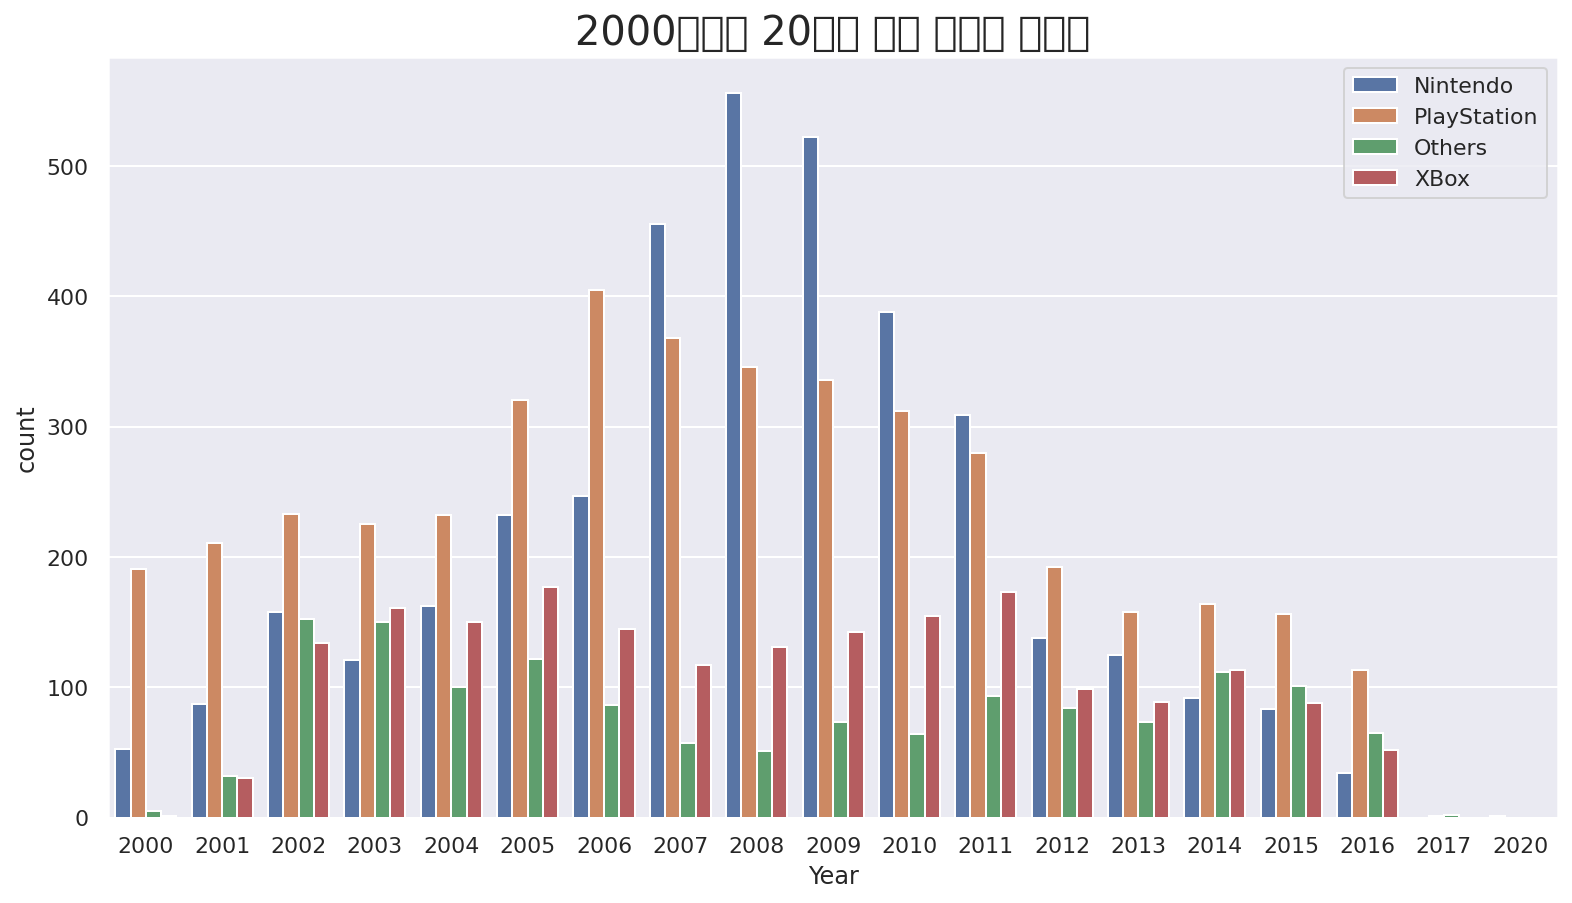

In [484]:
# platform을 그룹화(platform_group)하여 20년간 게임 플랫폼 선호도 비교
sns.countplot(x="Year", hue="platform_group", data=over_2000)
plt.title("2000년부터 20년간 게임 플랫폼 선호도", fontsize = 20)
sns.set(rc={'figure.figsize':(13,7)})
plt.legend(loc='upper right')
plt.show()

**📌 2012년 기점으로 Ninytendo플랫폼 보다 높아짐. PlayStation 플랫폼을 이용하는 것이 유리함.**

***3️⃣  출고량이 높은 게임에 대한 분석 및 시각화 프로세스***

In [475]:
total_sales_50 = df.nlargest(50, 'total_sales', keep='first')
total_sales_500 = df.nlargest(500, 'total_sales', keep='first')

In [476]:
# 총 판매량의 순위가 50위 안에 드는 게임의 플랫폼 비교
total_sales_50_platform = total_sales_50.groupby('platform_group')['Name'].size().sort_values(ascending=False)
total_sales_50_platform = pd.DataFrame(total_sales_50_platform)
# total_sales_50.reset_index(inplace=True)
total_sales_50_platform

,Name
platform_group,
Nintendo,27
PlayStation,15
XBox,8


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_

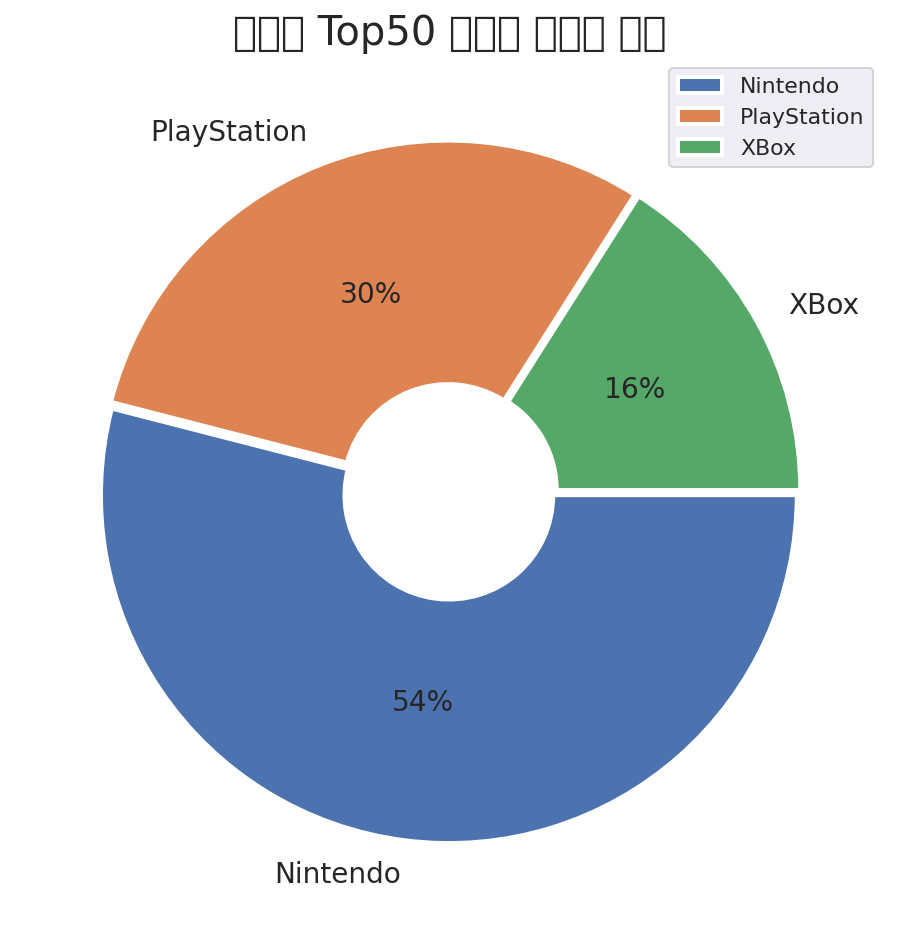

In [477]:
explode = [0.01, 0.01, 0.01]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
total_sales_50_platform.plot(fontsize=14, figsize=(10, 8), kind = 'pie', counterclock=False, autopct='%1.0f%%', explode=explode, wedgeprops=wedgeprops, y='Name')
plt.title('판매량 Top50 게임의 플랫폼 비율', size=20)
plt.ylabel('')
plt.show()

In [478]:
# 총 판매량의 순위가 500위 안에 드는 게임의 플랫폼 비교
total_sales_500_platform = total_sales_500.groupby('platform_group')['Name'].size()
total_sales_500_platform = pd.DataFrame(total_sales_500_platform)
total_sales_500_platform

,Name
platform_group,
Nintendo,152
Others,28
PlayStation,230
XBox,90


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_

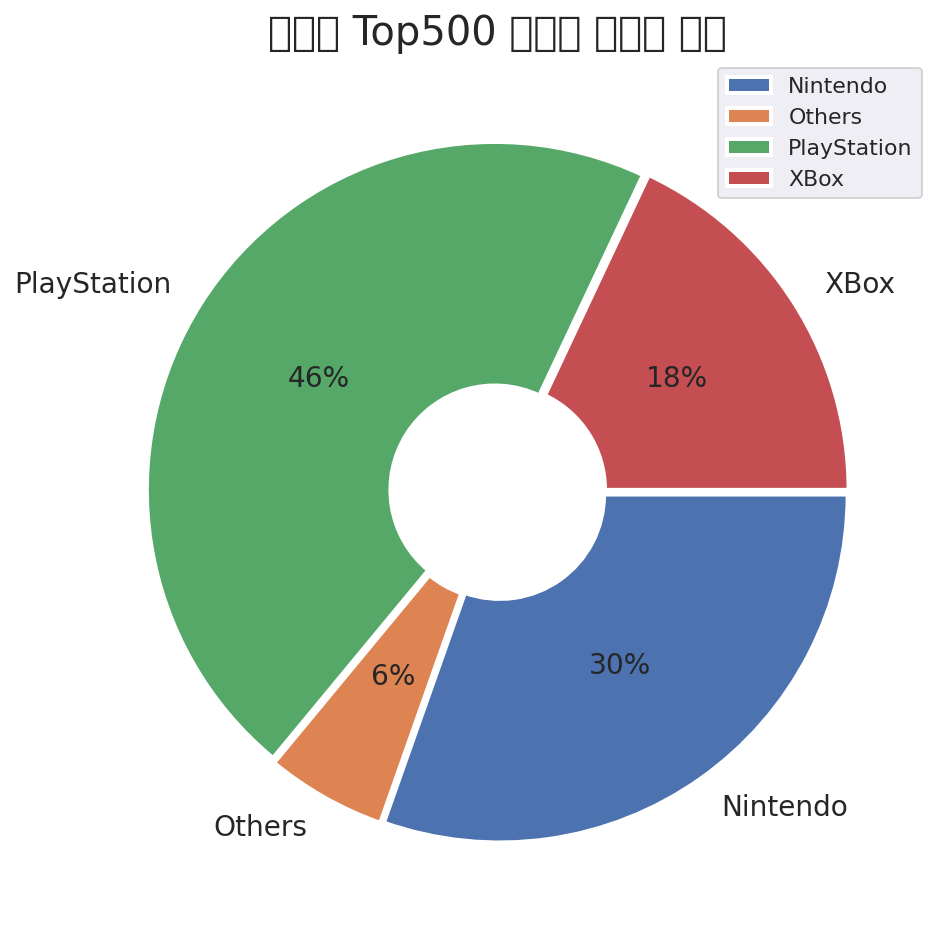

In [479]:
explode = [0.01, 0.01, 0.01,0.01]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
total_sales_500_platform.plot(fontsize=14, figsize=(10, 8), kind = 'pie', counterclock=False, autopct='%1.0f%%', explode=explode, wedgeprops=wedgeprops, y='Name')
plt.title('판매량 Top500 게임의 플랫폼 비율', size=20)
plt.legend(loc='upper right')
plt.ylabel('')
plt.show()

In [480]:
# 총 판매량의 순위가 50위 안에 드는 게임의 Genre 비교
total_sales_50_genre = total_sales_50.groupby('Genre')['Name'].size().sort_values(ascending=False)
total_sales_50_genre = pd.DataFrame(total_sales_50_genre)
total_sales_50_genre

,Name
Genre,
Shooter,10
Action,9
Platform,8
Racing,7
Role-Playing,5
Sports,4
Misc,3
Simulation,2
Fighting,1


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_

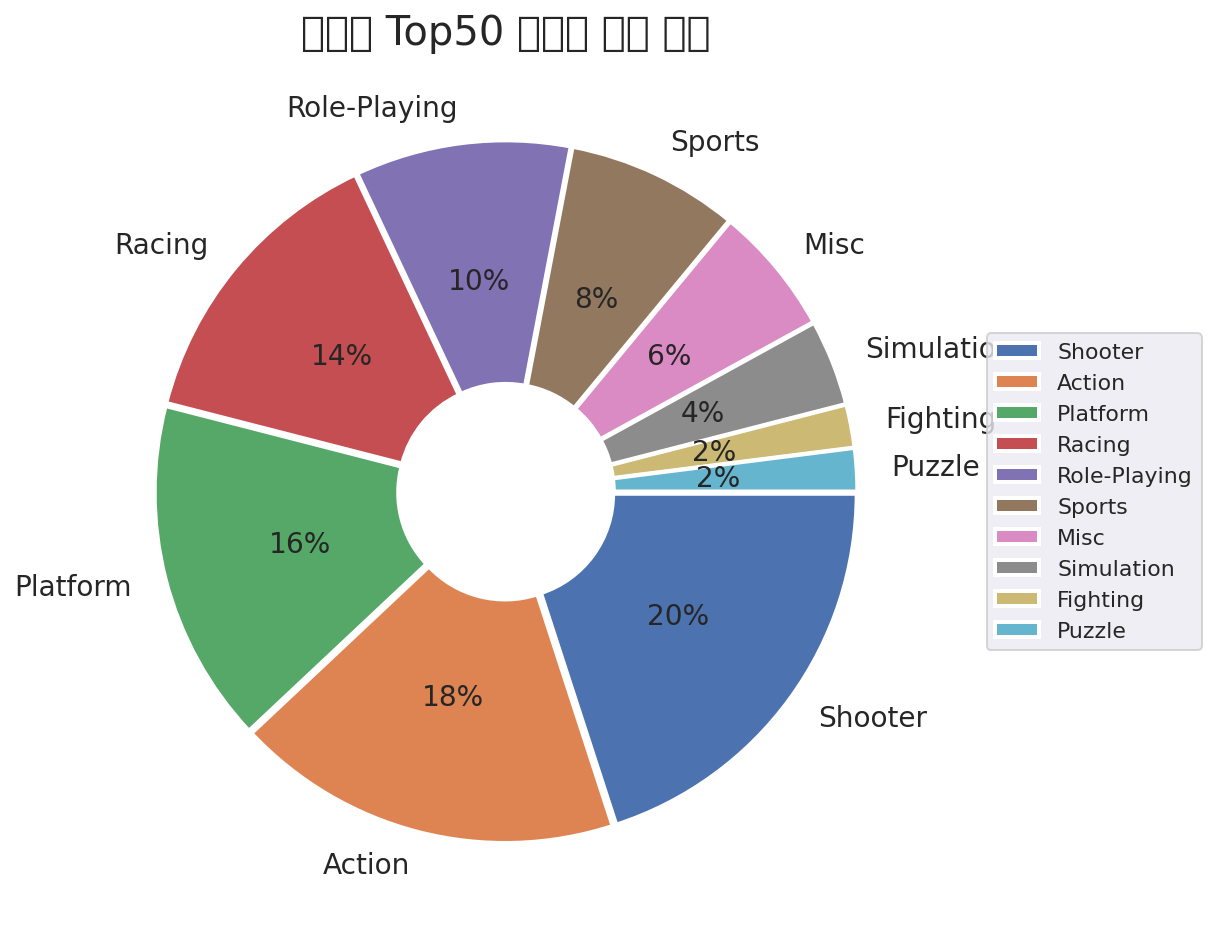

In [481]:
explode = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
total_sales_50_genre.plot(fontsize=14, figsize=(10, 8), kind = 'pie', counterclock=False, autopct='%1.0f%%', explode=explode, wedgeprops=wedgeprops, y='Name')
plt.title('판매량 Top50 게임의 장르 비율', size=20)
plt.ylabel('')
plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5 ))
plt.show()

In [482]:
# 총 판매량의 순위가 500위 안에 드는 게임의 Genre 비교
total_sales_500_genre = total_sales_500.groupby('Genre')['Name'].size().sort_values(ascending=False)
total_sales_500_genre = pd.DataFrame(total_sales_500_genre)
total_sales_500_genre

,Name
Genre,
Action,107
Shooter,85
Sports,63
Platform,50
Role-Playing,48
Misc,40
Racing,36
Fighting,28
Simulation,21


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_

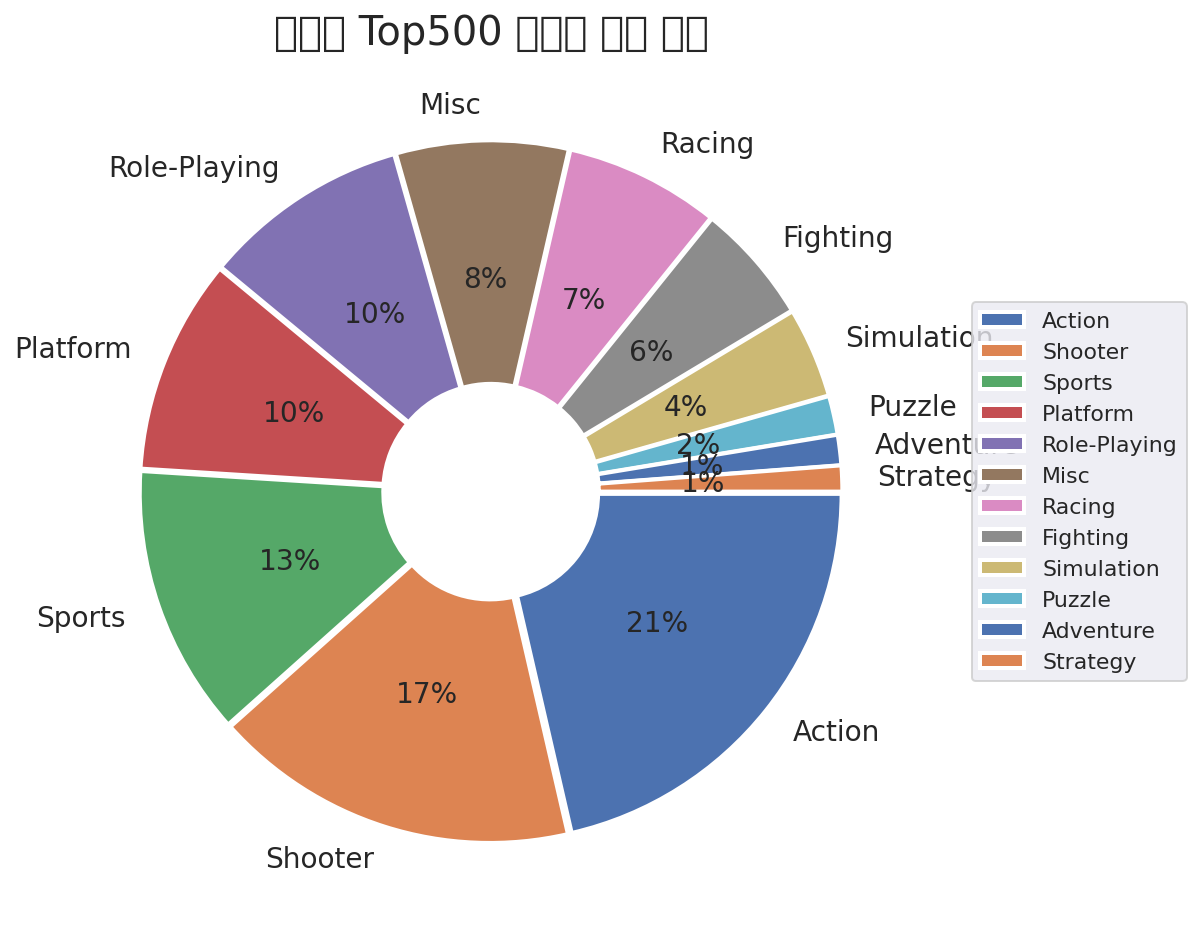

In [483]:
explode = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
total_sales_500_genre.plot(fontsize=14, figsize=(10, 8), kind = 'pie', counterclock=False, autopct='%1.0f%%', explode=explode, wedgeprops=wedgeprops, y='Name')
plt.title('판매량 Top500 게임의 장르 비율', size=20)
plt.ylabel('')
plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5 ))
plt.show()